# 1. Upload the Dataset to Google Colab

In [6]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset directly from the URL
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bank-full.csv'
df = pd.read_csv(url, sep=';')

# Verify successful loading
print(df.head())



   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# 2. Identifying Missing Values


In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# 3. Transformation Techniques
# 3.1 Data Deduplication


In [8]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()
print("Duplicates removed.")



Number of duplicate rows: 12
Duplicates removed.


# 3.2 Replacing Values

In [9]:
print("\nUnique values in 'job':", df['job'].unique())
df['job'] = df['job'].replace({'unknown': 'other'})
print("Replaced 'unknown' with 'other' in 'job' column.")


Unique values in 'job': ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Replaced 'unknown' with 'other' in 'job' column.


# 3.3 Handling Missing Data
# Checking again if any missing values remain

In [10]:
df.fillna(method='ffill', inplace=True)
print("Missing values handled using forward fill.")

Missing values handled using forward fill.


<ipython-input-10-06360d685882>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# 4. Discretization and Binning
# Bin 'age' into age groups

In [11]:
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
print("Age column binned into age groups.")


Age column binned into age groups.


# 5. Outlier Detection and Filtering
# Using IQR for 'duration'

In [15]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['duration'] >= lower_bound) & (df['duration'] <= upper_bound)]
print(f"Original dataset size: {len(df)}, After outlier removal: {len(filtered_df)}")


Original dataset size: 41176, After outlier removal: 38213


# 6. Visualization

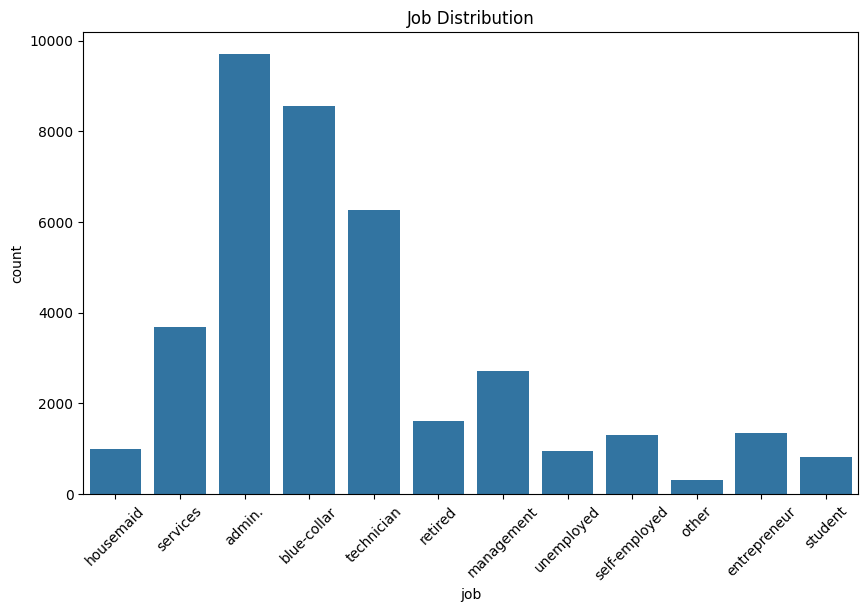

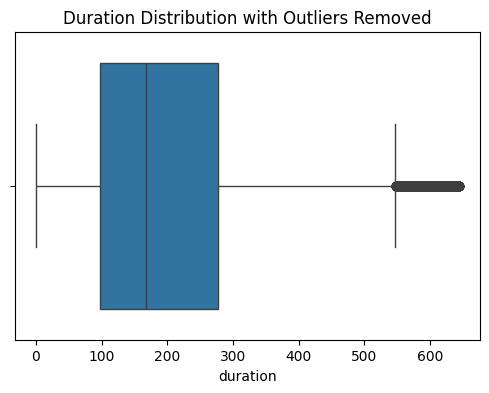

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='job', data=filtered_df)
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='duration', data=filtered_df)
plt.title('Duration Distribution with Outliers Removed')
plt.show()

# 7. Reshaping with Hierarchical Indexing

In [18]:
pivot_table = filtered_df.pivot_table(values='duration', index=['marital', 'education'], columns='y', aggfunc='mean')
print("\nPivot Table with Hierarchical Indexing:\n", pivot_table)

print("\nEDA and Model Training Completed Successfully!")



Pivot Table with Hierarchical Indexing:
 y                                     no         yes
marital  education                                  
divorced basic.4y             198.178571  318.430769
         basic.6y             205.292994  332.714286
         basic.9y             200.472868  461.916667
         high.school          193.322767  331.926471
         illiterate           146.000000  128.000000
         professional.course  187.080000  356.111111
         university.degree    189.564304  322.157407
         unknown              195.129630  311.176471
married  basic.4y             200.487787  342.193548
         basic.6y             194.153113  385.636364
         basic.9y             199.418799  375.220690
         high.school          193.724023  351.670068
         illiterate           163.818182  306.500000
         professional.course  186.411020  345.160643
         university.degree    184.655934  320.707401
         unknown              191.909193  297.297619
sing